In [42]:
import keras
from keras.datasets import mnist
import numpy as np

In [43]:
(train_images, train_labels), _ = mnist.load_data()

In [44]:
print(train_images.shape)
print(train_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [45]:
train_images = train_images.reshape((60000, 28 * 28))
print(train_images.shape)
print(train_images[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

In [46]:
train_images = train_images.astype("float32") / 255 
print(train_images[0])
print(len(train_images[0]))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [47]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

len(train_images_with_noise_channels[0])

1568

In [48]:
 train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

len(train_images_with_zeros_channels[0])

1568

In [51]:
import keras 
from keras import layers

def get_model():
    model = keras.Sequential([
         layers.Dense(512, activation="relu"),
         layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
          loss="sparse_categorical_crossentropy",
          metrics=["accuracy"]
    )
    return model
 

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7086 - loss: 1.0292 - val_accuracy: 0.8806 - val_loss: 0.3817
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9153 - loss: 0.2728 - val_accuracy: 0.9415 - val_loss: 0.1958
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9489 - loss: 0.1681 - val_accuracy: 0.9466 - val_loss: 0.1751
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9624 - loss: 0.1178 - val_accuracy: 0.9629 - val_loss: 0.1269
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9728 - loss: 0.0862 - val_accuracy: 0.9576 - val_loss: 0.1406
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9789 - loss: 0.0637 - val_accuracy: 0.9118 - val_loss: 0.2993
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9655 - val_loss: 0.1222
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9894 - loss: 0.0323 - val_accu

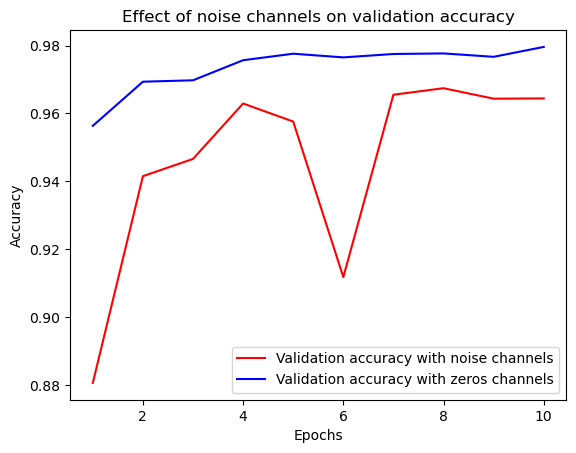

In [54]:
 import matplotlib.pyplot as plt
 val_acc_noise = history_noise.history["val_accuracy"]
 val_acc_zeros = history_zeros.history["val_accuracy"]
 epochs = range(1, 11)
 plt.plot(epochs, val_acc_noise, "r-",
 label="Validation accuracy with noise channels")
 plt.plot(epochs, val_acc_zeros, "b-",
 label="Validation accuracy with zeros channels")
 plt.title("Effect of noise channels on validation accuracy")
 plt.xlabel("Epochs")
 plt.ylabel("Accuracy")
 plt.legend()

In [ ]:
# noise channel -> val_accuracy: 0.9644 - val_loss: 0.1521
# zeros channel -> val_accuracy: 0.9796 - val_loss: 0.0760

#  the validation accuracy of the model trained with noise channels ends up about one percentage point lower —purely through the influence of spurious correlations. 
# The more noise channels you add, the further accuracy will degrade. Noisy features inevitably lead to overfitting.